In [1]:
# In [1]: Imports and read
import pandas as pd
import matplotlib.pyplot as plt

# Adjust the path as needed if your CSV lives elsewhere
df = pd.read_csv('test_results/test_results.csv')

In [2]:
# In [2]: Clean up the N/A values
# Convert to numeric (coerce errors → NaN), then fill
df['time_ms'] = pd.to_numeric(df['time_ms'], errors='coerce').fillna(15000)
df['num_states'] = pd.to_numeric(df['num_states'], errors='coerce').fillna(100)

In [3]:
# In [3]: Define which variables and metrics to plot
variables = ['count', 'constant', 'depth']
metrics   = ['time_ms', 'num_states']

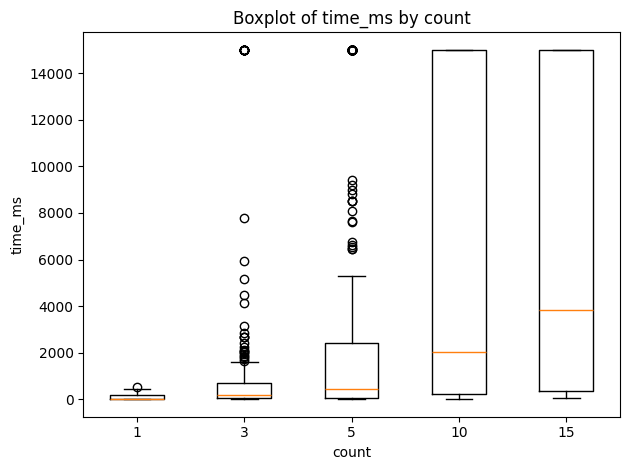

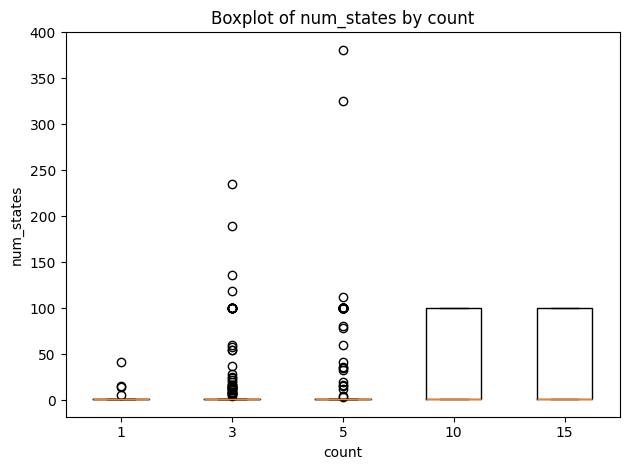

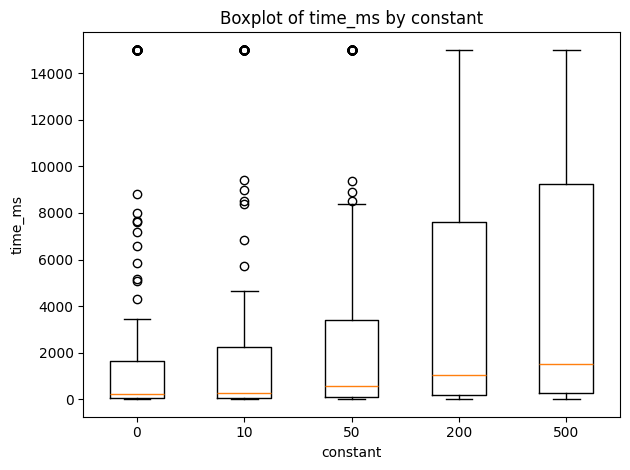

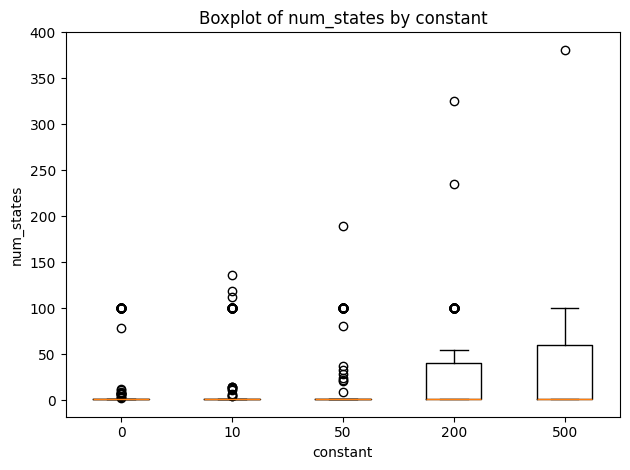

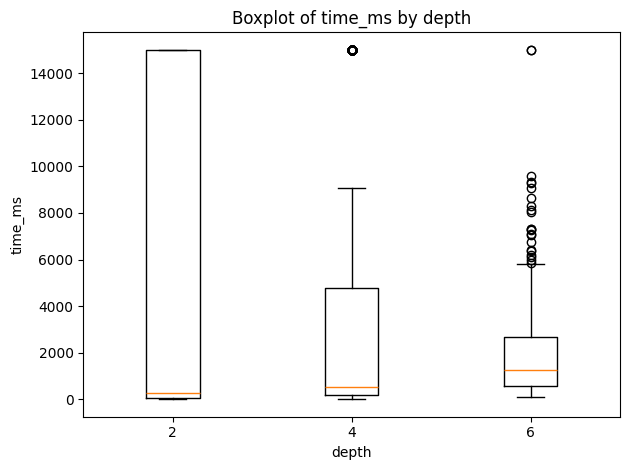

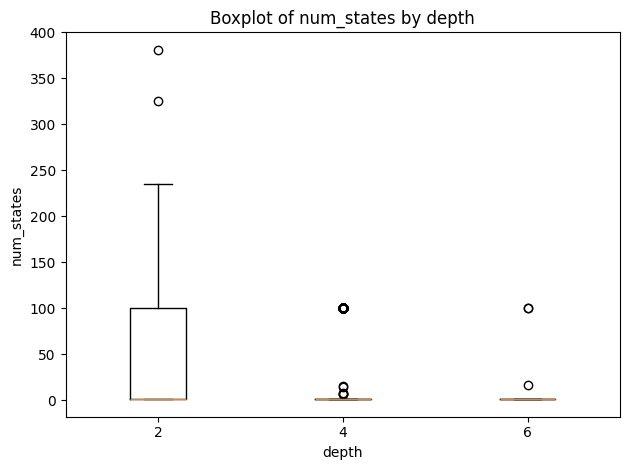

In [4]:
# In [4]: Loop over each combination and draw a boxplot
for var in variables:
    for metric in metrics:
        # get sorted list of unique discrete values
        vals = sorted(df[var].dropna().unique())
        # collect the metric arrays in order
        data = [df[df[var] == v][metric].values for v in vals]
        
        plt.figure()                           # one figure per plot
        plt.boxplot(data)
        plt.xlabel(var)
        plt.ylabel(metric)
        plt.title(f'Boxplot of {metric} by {var}')
        plt.xticks(range(1, len(vals) + 1), vals)
        plt.tight_layout()
        plt.show()

In [5]:
# In [5]: Load & clean for num_states‐only plots
import pandas as pd

df_ns = pd.read_csv('test_results/test_results.csv')
# convert num_states → numeric, drop N/A, drop those equal to 1
df_ns['num_states'] = pd.to_numeric(df_ns['num_states'], errors='coerce')
df_ns = df_ns.dropna(subset=['num_states'])
df_ns = df_ns[df_ns['num_states'] != 1]

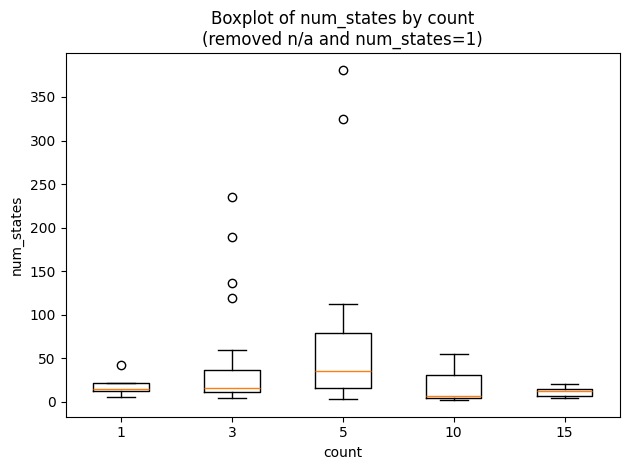

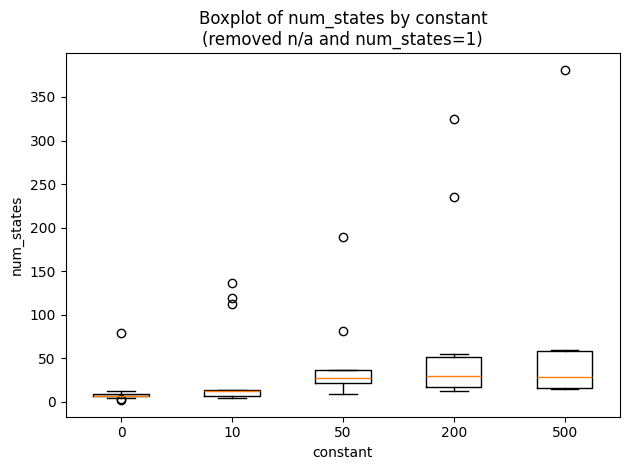

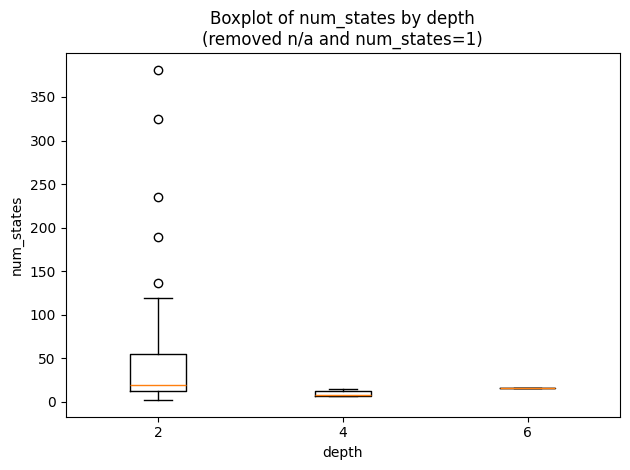

In [6]:
# In [6]: Boxplots of num_states by each discrete variable
import matplotlib.pyplot as plt

variables = ['count', 'constant', 'depth']

for var in variables:
    vals = sorted(df_ns[var].dropna().unique())
    data = [df_ns[df_ns[var] == v]['num_states'].values for v in vals]
    
    plt.figure()
    plt.boxplot(data)
    plt.xlabel(var)
    plt.ylabel('num_states')
    plt.title(f'Boxplot of num_states by {var}\n(removed n/a and num_states=1)')
    plt.xticks(range(1, len(vals) + 1), vals)
    plt.tight_layout()
    plt.show()

In [7]:
import pandas as pd
df = pd.read_csv('test_results/test_results.csv')

# count rows that have any NaN
num_missing_rows = df.isna().any(axis=1).sum()
print(num_missing_rows)

385
